In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the geolocation dataset
geolocation_path = 'corrected_geolocation.csv'
geolocation_data = pd.read_csv(geolocation_path)
amenities_data = pd.read_csv('amenities.csv')
market_analysis_path = 'market_analysis.csv'
# Initial assessment of the geolocation dataset
geolocation_data.info()
geolocation_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unified_id   49311 non-null  object 
 1   month        49311 non-null  object 
 2   street_name  11589 non-null  object 
 3   latitude     49311 non-null  float64
 4   longitude    49311 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.9+ MB


,unified_id,month,street_name,latitude,longitude
0,AIR10052559,2022-12,Heavenly Valley Road,34.23948,-116.87991
1,AIR10178668,2022-12,Round Drive,34.25095,-116.94139
2,AIR10211700,2022-12,NaN,34.24516,-116.87618
3,AIR10344705,2022-12,NaN,34.26750,-116.86089
4,AIR10424683,2022-12,Starvation Flats Road,34.25341,-116.88025


In [25]:
# Filling missing values in the 'street_name' column with "Street name is not specified"
geolocation_data['street_name'].fillna("Street name is not specified", inplace=True)

# Checking the data after filling missing values
geolocation_data.head()


,unified_id,month,street_name,latitude,longitude
0,AIR10052559,2022-12,Heavenly Valley Road,34.23948,-116.87991
1,AIR10178668,2022-12,Round Drive,34.25095,-116.94139
2,AIR10211700,2022-12,Street name is not specified,34.24516,-116.87618
3,AIR10344705,2022-12,Street name is not specified,34.26750,-116.86089
4,AIR10424683,2022-12,Starvation Flats Road,34.25341,-116.88025


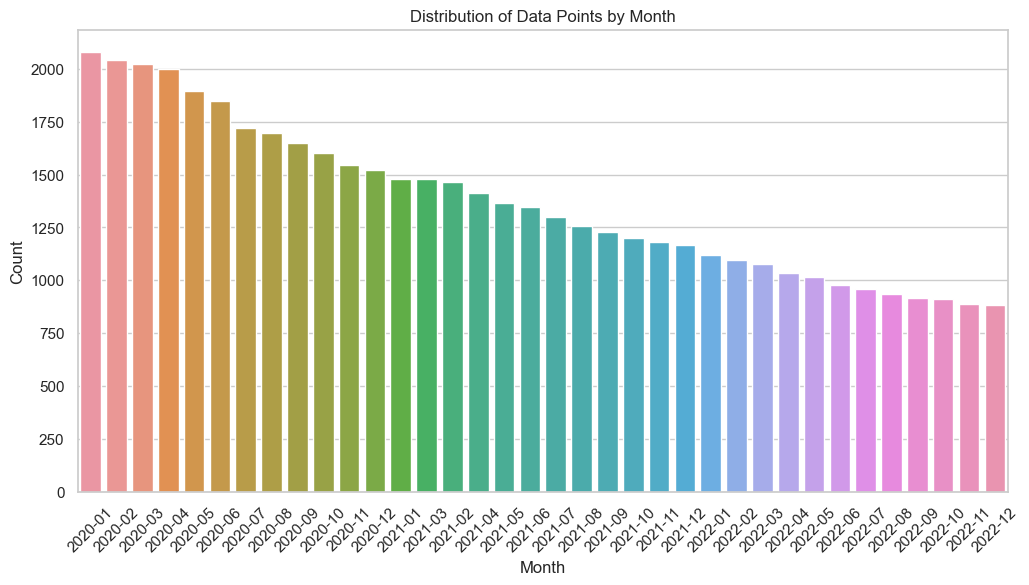

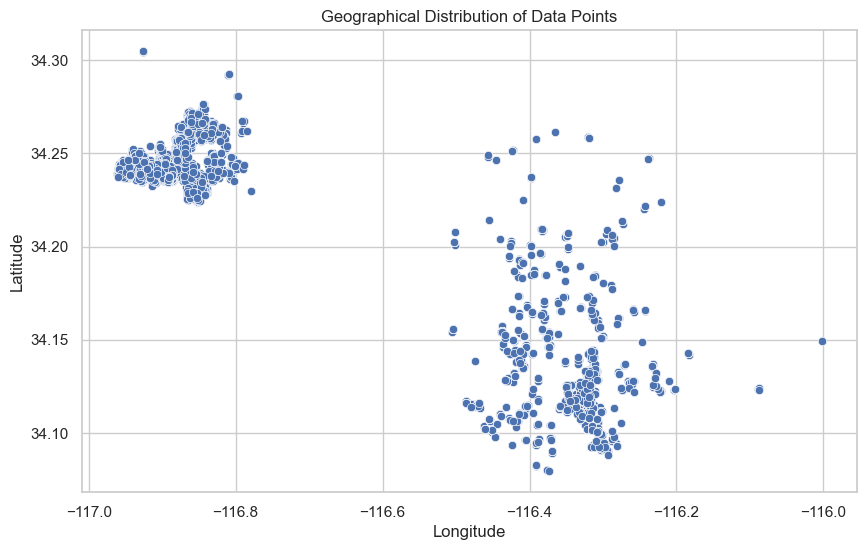

Most Common Street Names (excluding 'Street name is not specified'):
 street_name
Thrush Drive             413
Switzerland Drive        354
Starvation Flats Road    269
Villa Grove Avenue       227
Sheephorn Road           209
Name: count, dtype: int64

Least Common Street Names (excluding 'Street name is not specified'):
 street_name
Alta Avenue          4
Forest Hill Drive    3
Teakwood Drive       2
Crimson Circle       2
Glenwood Drive       1
Name: count, dtype: int64


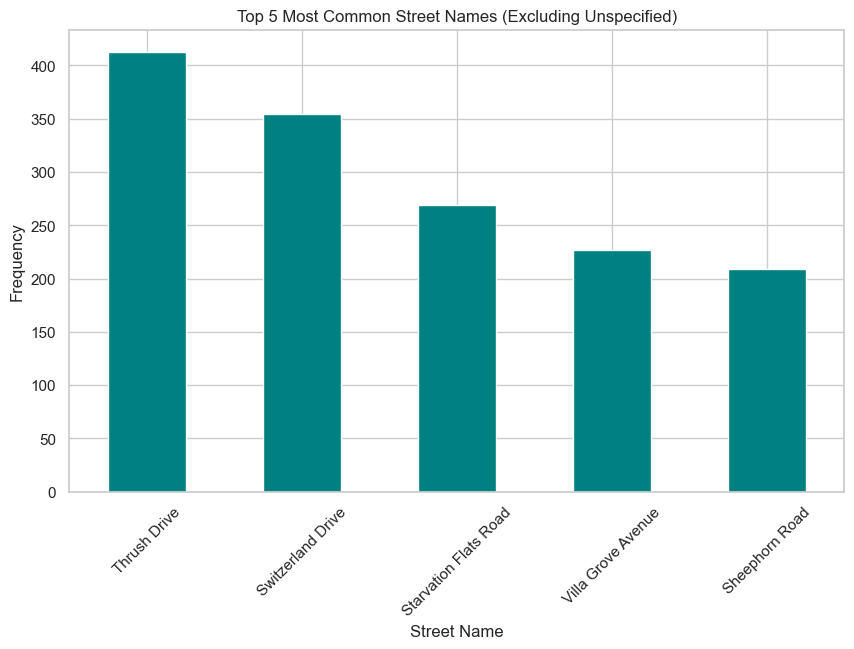

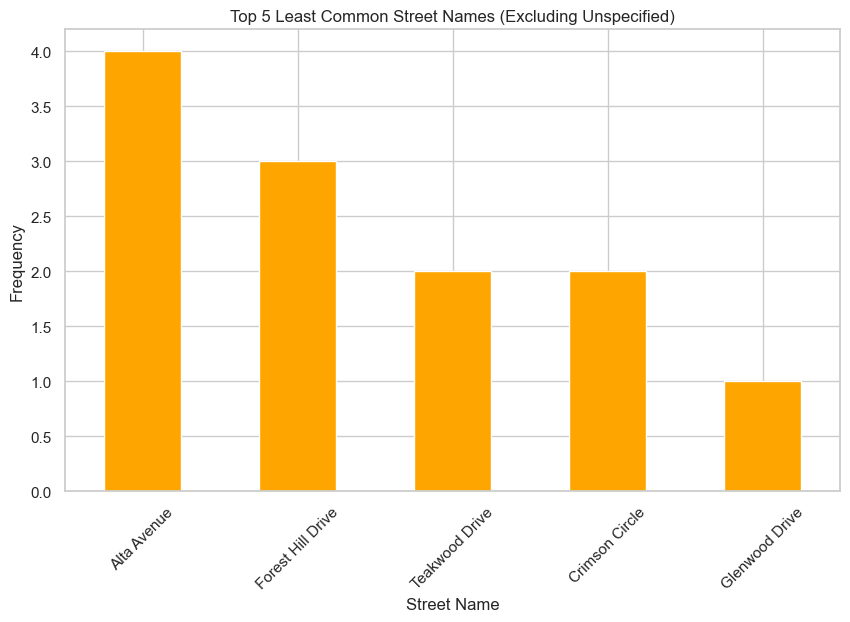

In [26]:
# Distribution of Data Points by Month
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=geolocation_data, order = geolocation_data['month'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Data Points by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.savefig('distribution_of_data_points_by_month.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=geolocation_data)
plt.title('Geographical Distribution of Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('geographical_distribution.png')
plt.show()
# Excluding cases where street name is not specified
filtered_streets = geolocation_data[geolocation_data['street_name'] != "Street name is not specified"]

# Analyzing the frequency of different street names in the filtered data
filtered_street_name_counts = filtered_streets['street_name'].value_counts()

# Displaying the top 5 most common street names in the filtered data
most_common_streets_filtered = filtered_street_name_counts.head(5)
print("Most Common Street Names (excluding 'Street name is not specified'):\n", most_common_streets_filtered)

# Displaying the 5 least common street names in the filtered data
least_common_streets_filtered = filtered_street_name_counts.tail(5)
print("\nLeast Common Street Names (excluding 'Street name is not specified'):\n", least_common_streets_filtered)

# Plotting the top 5 most common street names (excluding 'Street name is not specified')
plt.figure(figsize=(10, 6))
most_common_streets_filtered.plot(kind='bar', color='teal')
plt.title('Top 5 Most Common Street Names (Excluding Unspecified)')
plt.xlabel('Street Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('top5_most_common_street_names.png')
plt.show()

# Plotting the 5 least common street names (excluding 'Street name is not specified')
plt.figure(figsize=(10, 6))
least_common_streets_filtered.plot(kind='bar', color='orange')
plt.title('Top 5 Least Common Street Names (Excluding Unspecified)')
plt.xlabel('Street Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('top5_least_common_street_names.png')
plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49311 entries, 0 to 49310
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unified_id  49311 non-null  object
 1   month       49311 non-null  object
 2   hot_tub     49311 non-null  int64 
 3   pool        49311 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


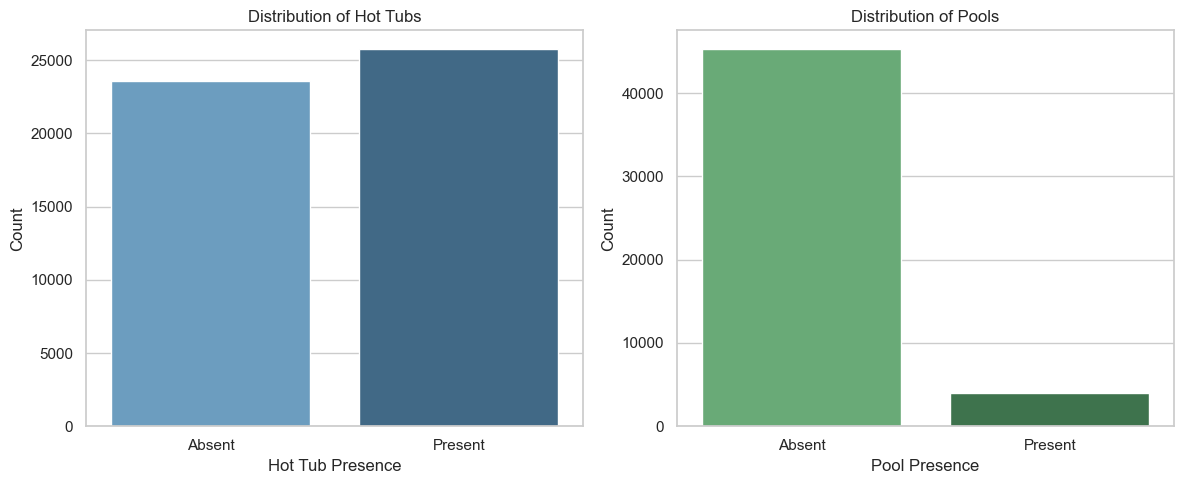

In [27]:
# Splitting the single column into multiple columns based on the semicolon delimiter
amenities_data = amenities_data['unified_id;month;hot_tub;pool'].str.split(';', expand=True)

# Renaming the columns
amenities_data.columns = ['unified_id', 'month', 'hot_tub', 'pool']

# Converting 'hot_tub' and 'pool' columns to integer type
amenities_data['hot_tub'] = amenities_data['hot_tub'].astype(int)
amenities_data['pool'] = amenities_data['pool'].astype(int)

# Checking the transformed dataset
amenities_data.info()
amenities_data.head()

# Analyzing the distribution of hot tubs and pools
hot_tub_distribution = amenities_data['hot_tub'].value_counts()
pool_distribution = amenities_data['pool'].value_counts()

# Visualization
plt.figure(figsize=(12, 5))

# Plot for hot tub distribution
plt.subplot(1, 2, 1)
sns.barplot(x=hot_tub_distribution.index, y=hot_tub_distribution.values, palette="Blues_d")
plt.title('Distribution of Hot Tubs')
plt.xlabel('Hot Tub Presence')
plt.ylabel('Count')
plt.xticks([0, 1], ['Absent', 'Present'])

# Plot for pool distribution
plt.subplot(1, 2, 2)
sns.barplot(x=pool_distribution.index, y=pool_distribution.values, palette="Greens_d")
plt.title('Distribution of Pools')
plt.xlabel('Pool Presence')
plt.ylabel('Count')
plt.xticks([0, 1], ['Absent', 'Present'])

plt.tight_layout()
plt.savefig('distribution_of_hot_tubs_and_pools.png')
plt.show()


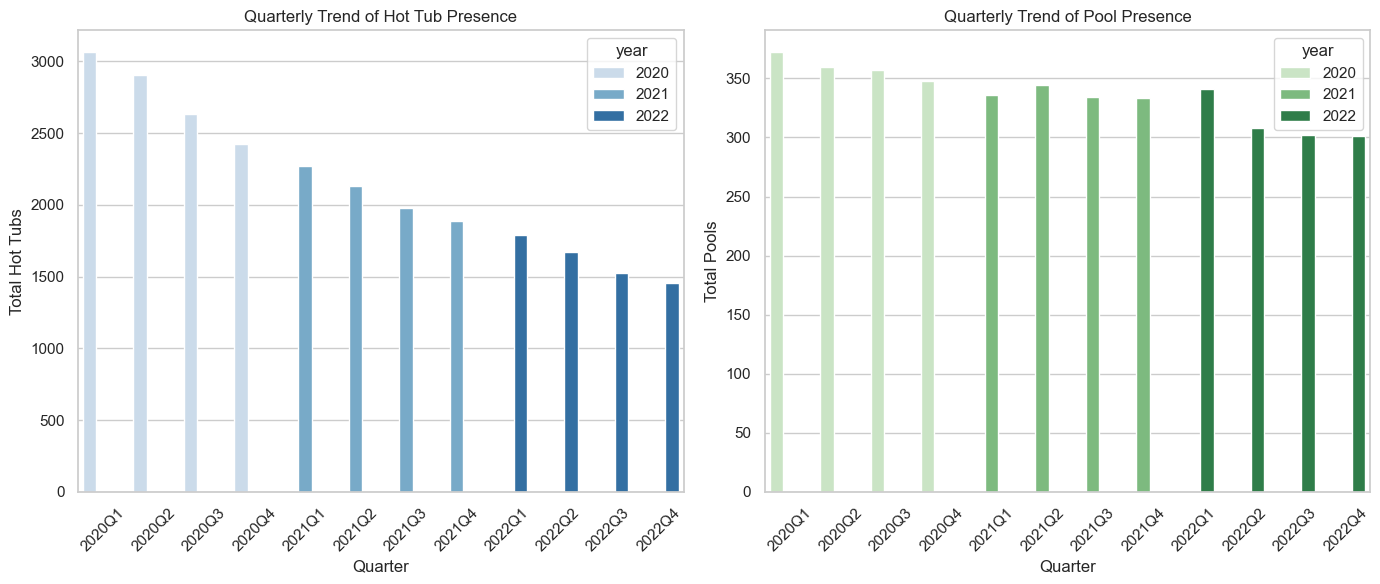

In [28]:
# Creating a new column for quarterly bins
# Assuming the 'month' format is 'YYYY-MM', we can extract the year and month to create quarters
amenities_data['year'] = amenities_data['month'].str[:4]
amenities_data['quarter'] = pd.to_datetime(amenities_data['month']).dt.to_period('Q')

# Grouping data by quarter and calculating the sum for hot tubs and pools
quarterly_amenities = amenities_data.groupby(['year', 'quarter'])[['hot_tub', 'pool']].sum().reset_index()
# Re-plotting with adjusted tick angles

plt.figure(figsize=(14, 6))

# Plot for hot tub trends by quarter
plt.subplot(1, 2, 1)
sns.barplot(x='quarter', y='hot_tub', hue='year', data=quarterly_amenities, palette='Blues')
plt.title('Quarterly Trend of Hot Tub Presence')
plt.xlabel('Quarter')
plt.ylabel('Total Hot Tubs')
plt.xticks(rotation=45)  # Rotating ticks

# Plot for pool trends by quarter
plt.subplot(1, 2, 2)
sns.barplot(x='quarter', y='pool', hue='year', data=quarterly_amenities, palette='Greens')
plt.title('Quarterly Trend of Pool Presence')
plt.xlabel('Quarter')
plt.ylabel('Total Pools')
plt.xticks(rotation=45)  # Rotating ticks

plt.tight_layout()
plt.savefig('quarterly_trend_of_hot_tubs_and_pools.png')
plt.show()


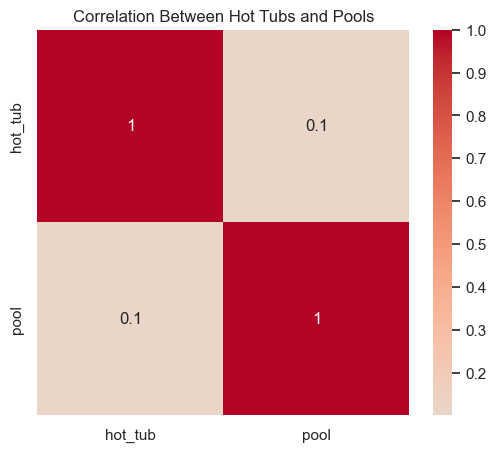

In [29]:
# Correlation analysis between hot tubs and pools
correlation = amenities_data[['hot_tub', 'pool']].corr()

# Visualization of the correlation
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Hot Tubs and Pools')
plt.savefig('correlation_between_hot_tubs_and_pools.png')
plt.show()


In [30]:
# Reading the file using semicolon as the delimiter and handling comma in numbers
market_analysis_data = pd.read_csv(market_analysis_path, delimiter=';', decimal=',')

# Initial assessment of the corrected market analysis dataset
market_analysis_data.info()
market_analysis_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116619 entries, 0 to 116618
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   unified_id    116619 non-null  int64  
 1   month         116619 non-null  object 
 2   zipcode       116619 non-null  int64  
 3   city          116619 non-null  object 
 4   host_type     116619 non-null  object 
 5   bedrooms      116619 non-null  int64  
 6   bathrooms     116619 non-null  object 
 7   guests        116619 non-null  object 
 8   revenue       116613 non-null  float64
 9   openness      116619 non-null  int64  
 10  occupancy     116619 non-null  float64
 11  nightly rate  93146 non-null   float64
 12  lead time     86025 non-null   float64
 13  length stay   86025 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 12.5+ MB


,unified_id,month,zipcode,city,host_type,bedrooms,bathrooms,guests,revenue,openness,occupancy,nightly rate,lead time,length stay
0,10000347,2020-1,92315,Big Bear Lake,2-5 Units,3,2,10,899.959992,31,0.064516,449.979996,52.0,3.0
1,10000347,2020-10,92315,Big Bear Lake,2-5 Units,3,2,10,13950.000000,31,1.000000,450.000000,NaN,NaN
2,10000347,2020-11,92315,Big Bear Lake,2-5 Units,3,2,10,13500.000000,30,1.000000,450.000000,NaN,NaN
3,10000347,2020-12,92315,Big Bear Lake,2-5 Units,3,2,10,13950.000000,31,1.000000,450.000000,NaN,NaN
4,10000347,2020-2,92315,Big Bear Lake,2-5 Units,3,2,10,450.000000,29,0.034483,450.000000,8.0,1.0


In [31]:
# Summary statistics of the numerical columns
numerical_summary = market_analysis_data.describe()

numerical_summary


,unified_id,zipcode,bedrooms,revenue,openness,occupancy,nightly rate,lead time,length stay
count,1.166190e+05,116619.000000,116619.000000,116613.000000,116619.000000,116619.000000,93146.000000,86025.000000,86025.000000
mean,4.391803e+16,92305.000429,3.401538,5745.195040,28.334217,0.438305,451.617793,34.262351,5.243706
std,1.609115e+17,20.624257,0.633803,7264.663998,6.164065,0.345929,341.985164,39.568512,17.170159
min,5.874800e+04,92252.000000,3.000000,0.000000,1.000000,0.000000,10.000000,1.000000,1.000000
25%,2.229672e+07,92314.000000,3.000000,796.000000,30.000000,0.100000,241.462225,10.857143,2.000000
50%,4.011635e+07,92315.000000,3.000000,3811.000000,30.000000,0.419355,356.000000,22.916667,2.500000
75%,4.802902e+07,92315.000000,4.000000,8000.000000,31.000000,0.741935,554.737500,43.000000,3.250000
max,7.930037e+17,92315.000000,5.000000,151900.000000,31.000000,1.000000,10000.000000,364.000000,365.000000


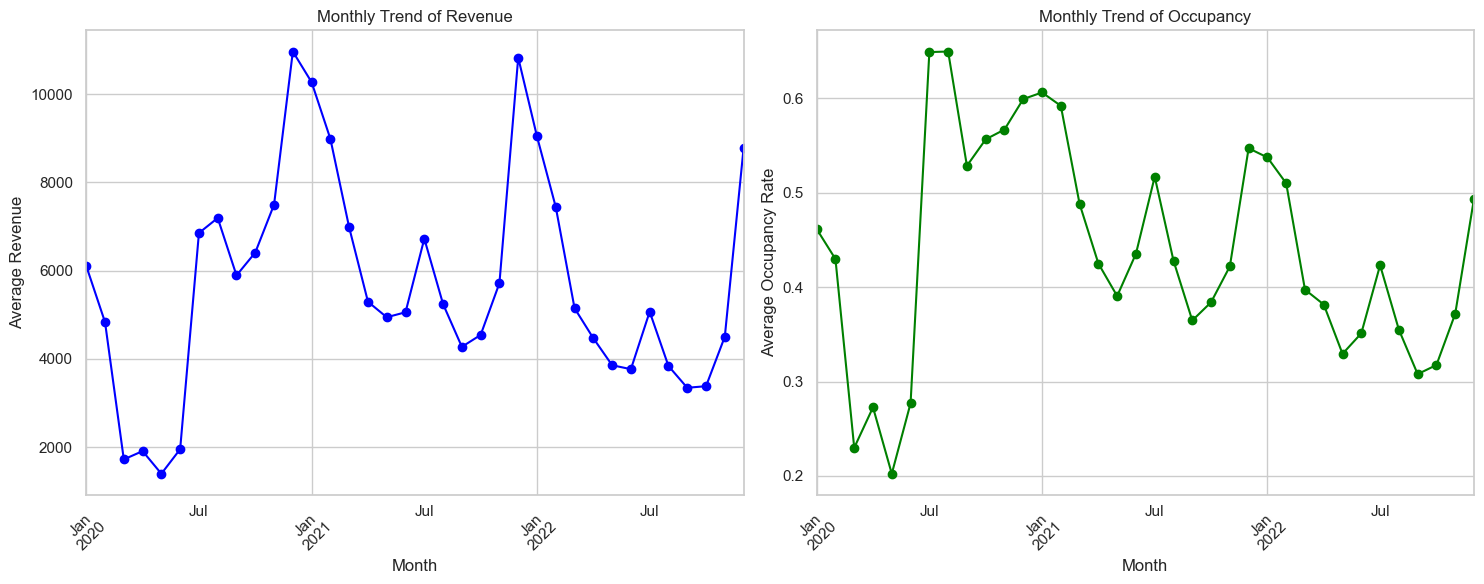

In [34]:
# Convert 'month' column to datetime type
market_analysis_data['month'] = pd.to_datetime(market_analysis_data['month'])

# Extracting only the relevant numerical columns for monthly trend analysis
numerical_columns = ['revenue', 'occupancy', 'nightly rate', 'lead time', 'length stay']

# Grouping data by month and calculating the mean for the selected numerical columns
monthly_trends_numerical = market_analysis_data.groupby(market_analysis_data['month'].dt.to_period('M'))[numerical_columns].mean()

# Visualization
plt.figure(figsize=(15, 6))

# Plot for monthly trend of revenue
plt.subplot(1, 2, 1)
monthly_trends_numerical['revenue'].plot(kind='line', marker='o', color='blue')
plt.title('Monthly Trend of Revenue')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

# Plot for monthly trend of occupancy
plt.subplot(1, 2, 2)
monthly_trends_numerical['occupancy'].plot(kind='line', marker='o', color='green')
plt.title('Monthly Trend of Occupancy')
plt.xlabel('Month')
plt.ylabel('Average Occupancy Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('monthly_trend_of_revenue_and_occupancy.png')
plt.show()


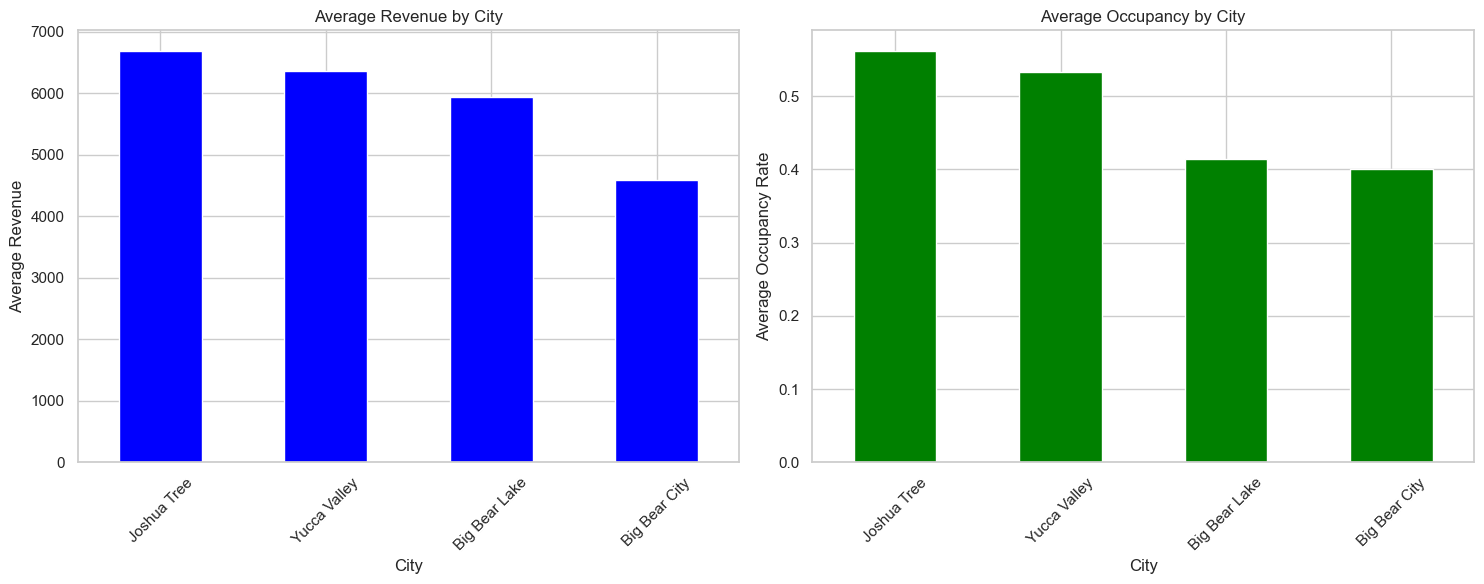

In [35]:
# Grouping data by city and calculating the mean for revenue and occupancy
city_trends = market_analysis_data.groupby('city')[['revenue', 'occupancy']].mean().sort_values(by='revenue', ascending=False)

# Visualization
plt.figure(figsize=(15, 6))

# Plot for average revenue by city
plt.subplot(1, 2, 1)
city_trends['revenue'].plot(kind='bar', color='blue')
plt.title('Average Revenue by City')
plt.xlabel('City')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

# Plot for average occupancy by city
plt.subplot(1, 2, 2)
city_trends['occupancy'].plot(kind='bar', color='green')
plt.title('Average Occupancy by City')
plt.xlabel('City')
plt.ylabel('Average Occupancy Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('average_revenue_and_occupancy_by_city.png')
plt.show()


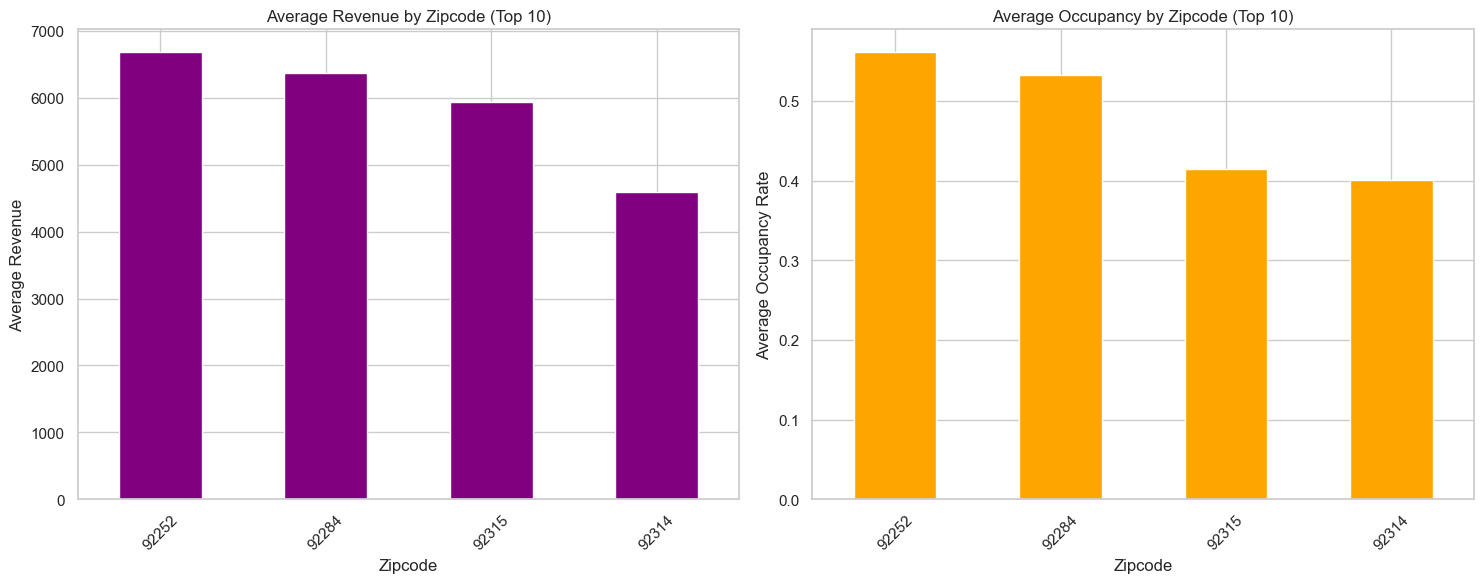

In [36]:
# Grouping data by zipcode and calculating the mean for revenue and occupancy
zipcode_trends = market_analysis_data.groupby('zipcode')[['revenue', 'occupancy']].mean().sort_values(by='revenue', ascending=False)

# Selecting top zip codes for visualization (for clarity in the plot)
top_zipcodes = zipcode_trends.head(10)

# Visualization
plt.figure(figsize=(15, 6))

# Plot for average revenue by zipcode
plt.subplot(1, 2, 1)
top_zipcodes['revenue'].plot(kind='bar', color='purple')
plt.title('Average Revenue by Zipcode (Top 10)')
plt.xlabel('Zipcode')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)

# Plot for average occupancy by zipcode
plt.subplot(1, 2, 2)
top_zipcodes['occupancy'].plot(kind='bar', color='orange')
plt.title('Average Occupancy by Zipcode (Top 10)')
plt.xlabel('Zipcode')
plt.ylabel('Average Occupancy Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('average_revenue_and_occupancy_by_zipcode.png')
plt.show()


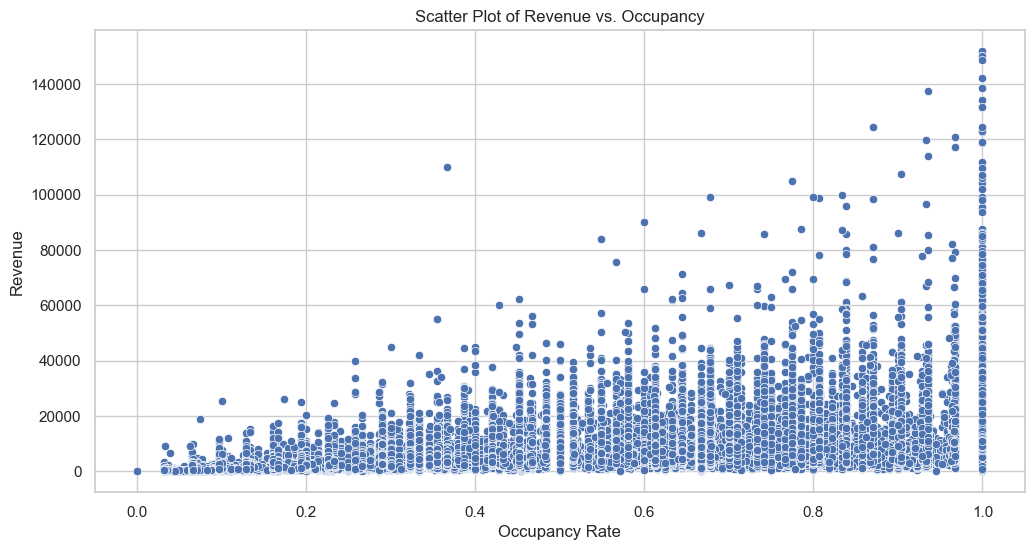

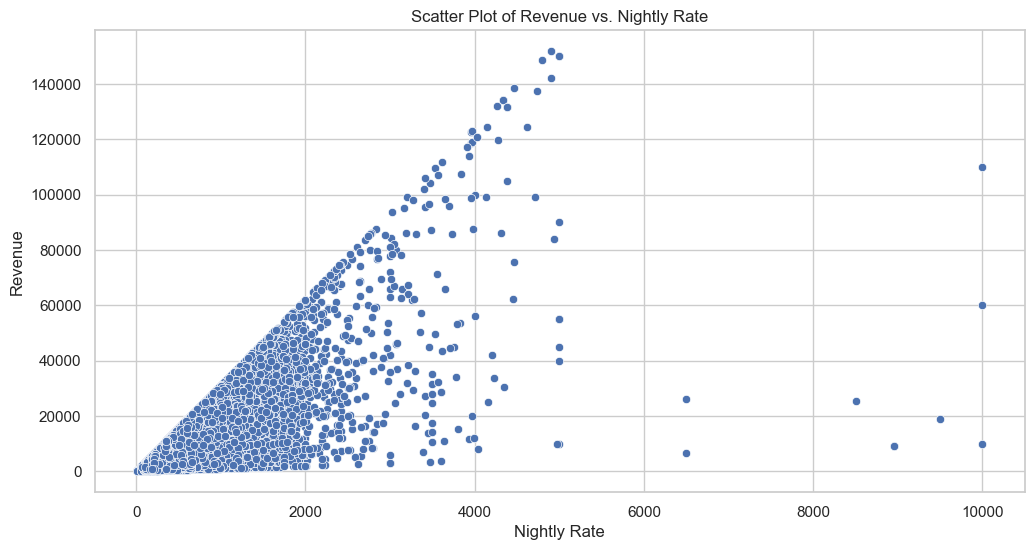

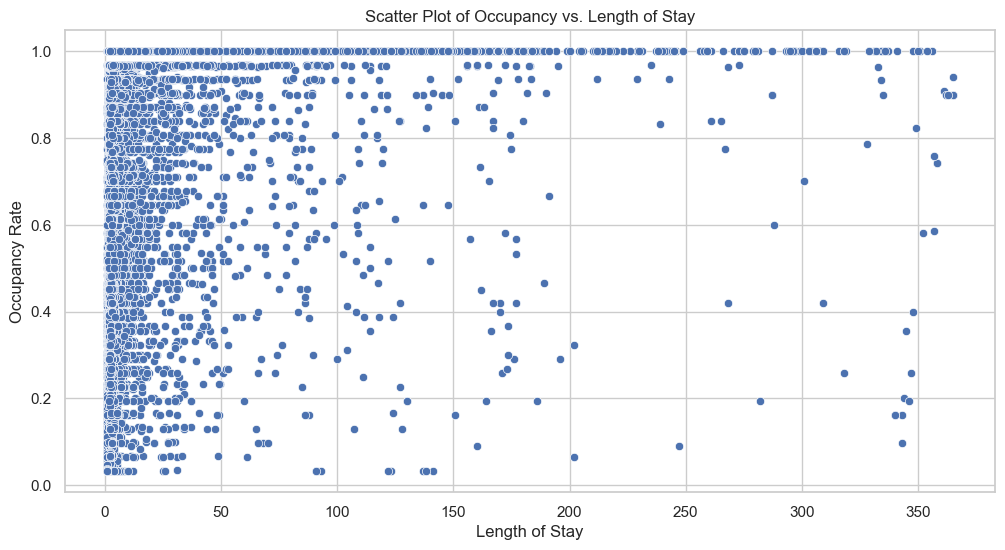

In [37]:
import seaborn as sns

# Scatter plot for Revenue vs. Occupancy
plt.figure(figsize=(12, 6))
sns.scatterplot(x='occupancy', y='revenue', data=market_analysis_data)
plt.title('Scatter Plot of Revenue vs. Occupancy')
plt.xlabel('Occupancy Rate')
plt.ylabel('Revenue')
plt.savefig('scatter_plot_of_revenue_vs_occupancy.png')
plt.show()

# Scatter plot for Revenue vs. Nightly Rate
plt.figure(figsize=(12, 6))
sns.scatterplot(x='nightly rate', y='revenue', data=market_analysis_data)
plt.title('Scatter Plot of Revenue vs. Nightly Rate')
plt.xlabel('Nightly Rate')
plt.ylabel('Revenue')
plt.savefig('scatter_plot_of_revenue_vs_nightly_rate.png')
plt.show()

# Scatter plot for Occupancy vs. Length of Stay
plt.figure(figsize=(12, 6))
sns.scatterplot(x='length stay', y='occupancy', data=market_analysis_data)
plt.title('Scatter Plot of Occupancy vs. Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Occupancy Rate')
plt.savefig('scatter_plot_of_occupancy_vs_length_of_stay.png')
plt.show()
